### 1. 导入所需要的包 / Import the required packages

In [1]:
## 导入所需要的包 / Import the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 2.读取文件 / read file

In [2]:
# 读取CSV文件 / Read CSV file
df = pd.read_csv("C:/Users/dell/Desktop/final_project/code-dataset/dataset/Complete_diabetes_prediction_dataset.csv")
df = pd.DataFrame(df)

In [3]:
# 查看数据的前5行 / View the first 5 rows of data
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
# 查看数据基本信息（包括数据类型和缺失值情况） / View basic information of data (including data types and missing values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [5]:
# 描述性统计 / #Descriptive statistics
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

### 3. 检查缺失值 / Check for missing values

In [6]:
# 检查每列是否有缺失值 / Check for missing values in each column
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### 4. 检查重复值 / Check for duplicate values

In [7]:
# 检查数据框中是否有重复值 / Check for duplicate values in the data box
duplicate_rows = df[df.duplicated()]

# 显示所有重复的行 / Display all duplicate rows
print(duplicate_rows)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [8]:
# 删除所有重复的行，仅保留第一个出现的 / Delete all duplicate rows, retaining only the first one that appears
df = df.drop_duplicates()

### 5. 处理极值 / Handling Extreme Values

d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


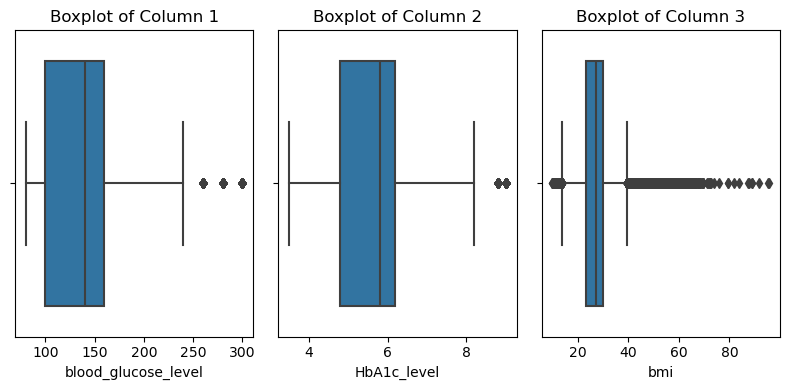

In [9]:
# 创建 2 行 2 列的布局 / Create a layout with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# 绘制第三个箱线图 / Draw the third box line diagram
sns.boxplot(x=df['blood_glucose_level'], ax=axes[0])
axes[0].set_title('Boxplot of Column 1')

sns.boxplot(x=df['HbA1c_level'], ax=axes[1])
axes[1].set_title('Boxplot of Column 2')

sns.boxplot(x=df['bmi'], ax=axes[2])
axes[2].set_title('Boxplot of Column 3')

# 自动调整子图间距 / Automatically adjust the spacing between subgraphs
plt.tight_layout()

# 显示图形 / plot show
plt.show()

In [10]:
 # 假设你在 DataFrame 中的列名为 'hypertension' / Assuming your column name in the DataFrame is' tension '
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# 计算上边界和下边界 / Calculate the upper and lower boundaries
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 将异常值替换为中位数 / Replace outliers with medians
df.loc[df['blood_glucose_level'] > upper_bound, 'blood_glucose_level'] = df['blood_glucose_level'].median()
df.loc[df['blood_glucose_level'] < lower_bound, 'blood_glucose_level'] = df['blood_glucose_level'].median()

In [11]:
# 假设你在 DataFrame 中的列名为 'hypertension' / Assuming your column name in the DataFrame is' tension '
Q1 = df['HbA1c_level'].quantile(0.25)
Q3 = df['HbA1c_level'].quantile(0.75)
IQR = Q3 - Q1

# 计算上边界和下边界 / Calculate the upper and lower boundaries
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 将异常值替换为中位数
df.loc[df['HbA1c_level'] > upper_bound, 'HbA1c_level'] = df['HbA1c_level'].median()
df.loc[df['HbA1c_level'] < lower_bound, 'HbA1c_level'] = df['HbA1c_level'].median()

In [12]:
# 假设你在 DataFrame 中的列名为 'hypertension'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# 计算上边界和下边界
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 将异常值替换为中位数
df.loc[df['bmi'] > upper_bound, 'bmi'] = df['bmi'].median()
df.loc[df['bmi'] < lower_bound, 'bmi'] = df['bmi'].median()

d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


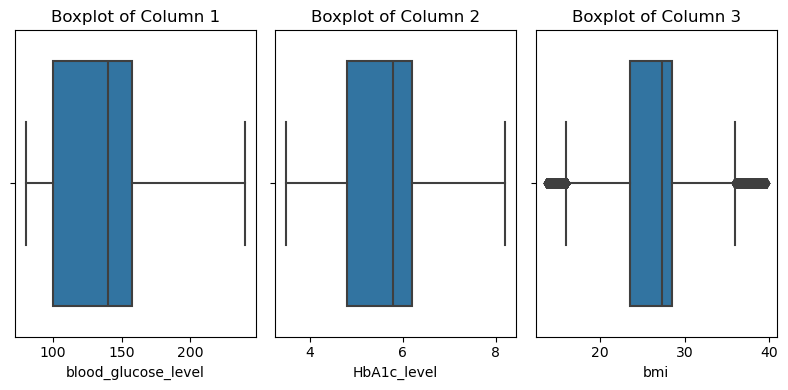

In [13]:
# 创建 2 行 2 列的布局
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,4))

# 绘制第三个箱线图
sns.boxplot(x=df['blood_glucose_level'], ax=axes[0])
axes[0].set_title('Boxplot of Column 1')

sns.boxplot(x=df['HbA1c_level'], ax=axes[1])
axes[1].set_title('Boxplot of Column 2')

sns.boxplot(x=df['bmi'], ax=axes[2])
axes[2].set_title('Boxplot of Column 3')

# 自动调整子图间距
plt.tight_layout()

# 显示图形
plt.show()

#### 6.独热编码转化

In [14]:
# 创建 OneHotEncoder 实例
encoder = OneHotEncoder(sparse=False)  # sparse=False 返回一个数组，不是稀疏矩阵

# 将 'gender' 和 'smoking_history' 列转换为独热编码
encoded_gender_smoking = encoder.fit_transform(df[['gender', 'smoking_history']])

# 将编码后的数据转换为 DataFrame，添加列名
encoded_df = pd.DataFrame(encoded_gender_smoking, 
                          columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

# 合并原 DataFrame 和编码后的 DataFrame
df = pd.concat([df, encoded_df], axis=1)

# 删除 'gender' 和 'smoking_history' 列
df = df.drop(['gender', 'smoking_history'], axis=1)

# 打印合并后的 DataFrame
print(df)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0           0.0            1.0  25.19          6.6   
1      54.0           0.0            0.0  27.32          6.6   
2      28.0           0.0            0.0  27.32          5.7   
3      36.0           0.0            0.0  23.45          5.0   
4      76.0           1.0            1.0  20.14          4.8   
...     ...           ...            ...    ...          ...   
96076   NaN           NaN            NaN    NaN          NaN   
96085   NaN           NaN            NaN    NaN          NaN   
96125   NaN           NaN            NaN    NaN          NaN   
96126   NaN           NaN            NaN    NaN          NaN   
96133   NaN           NaN            NaN    NaN          NaN   

       blood_glucose_level  diabetes  gender_Female  gender_Male  \
0                    140.0       0.0            1.0          0.0   
1                     80.0       0.0            1.0          0.0   
2                    158.0 

d:\Anconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
# 检查每列是否有缺失值
print(df.isnull().sum())

age                            3585
hypertension                   3585
heart_disease                  3585
bmi                            3585
HbA1c_level                    3585
blood_glucose_level            3585
diabetes                       3585
gender_Female                  3585
gender_Male                    3585
gender_Other                   3585
smoking_history_No Info        3585
smoking_history_current        3585
smoking_history_ever           3585
smoking_history_former         3585
smoking_history_never          3585
smoking_history_not current    3585
dtype: int64


In [16]:
df= df.dropna(axis=0, how='any')

In [17]:
# 检查每列是否有缺失值
print(df.isnull().sum())

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
gender_Female                  0
gender_Male                    0
gender_Other                   0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64


In [18]:
# 查看数据基本信息（包括数据类型和缺失值情况）
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 92561 entries, 0 to 96145
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          92561 non-null  float64
 1   hypertension                 92561 non-null  float64
 2   heart_disease                92561 non-null  float64
 3   bmi                          92561 non-null  float64
 4   HbA1c_level                  92561 non-null  float64
 5   blood_glucose_level          92561 non-null  float64
 6   diabetes                     92561 non-null  float64
 7   gender_Female                92561 non-null  float64
 8   gender_Male                  92561 non-null  float64
 9   gender_Other                 92561 non-null  float64
 10  smoking_history_No Info      92561 non-null  float64
 11  smoking_history_current      92561 non-null  float64
 12  smoking_history_ever         92561 non-null  float64
 13  smoking_history_forme

In [19]:
# 描述性统计
print(df.describe())

                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  92561.000000  92561.000000   92561.000000  92561.000000  92561.000000   
mean      41.779180      0.077376       0.040600     26.462067      5.489233   
std       22.462138      0.267189       0.197363      5.085449      0.998316   
min        0.080000      0.000000       0.000000     13.710000      3.500000   
25%       24.000000      0.000000       0.000000     23.510000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     28.460000      6.200000   
max       80.000000      1.000000       1.000000     39.550000      8.200000   

       blood_glucose_level      diabetes  gender_Female   gender_Male  \
count         92561.000000  92561.000000   92561.000000  92561.000000   
mean            135.215955      0.088115       0.584123      0.415693   
std              35.092571      0.283463       0.492875     

In [20]:
# 获取所有列名
columns = df.columns.tolist()

# 将第 7 列（索引 6）移动到最后一列
columns = columns[:6] + columns[7:] + [columns[6]]

# 重新排列列顺序
df_reordered = df[columns]

In [21]:

# # 保存调整后的数据到新的 CSV 文件
# data_reordered.to_csv('C:/Users/29548/Desktop/dataset/reordered_dataset.csv', index=False)

# print("调整后的数据已保存为 reordered_dataset.csv")

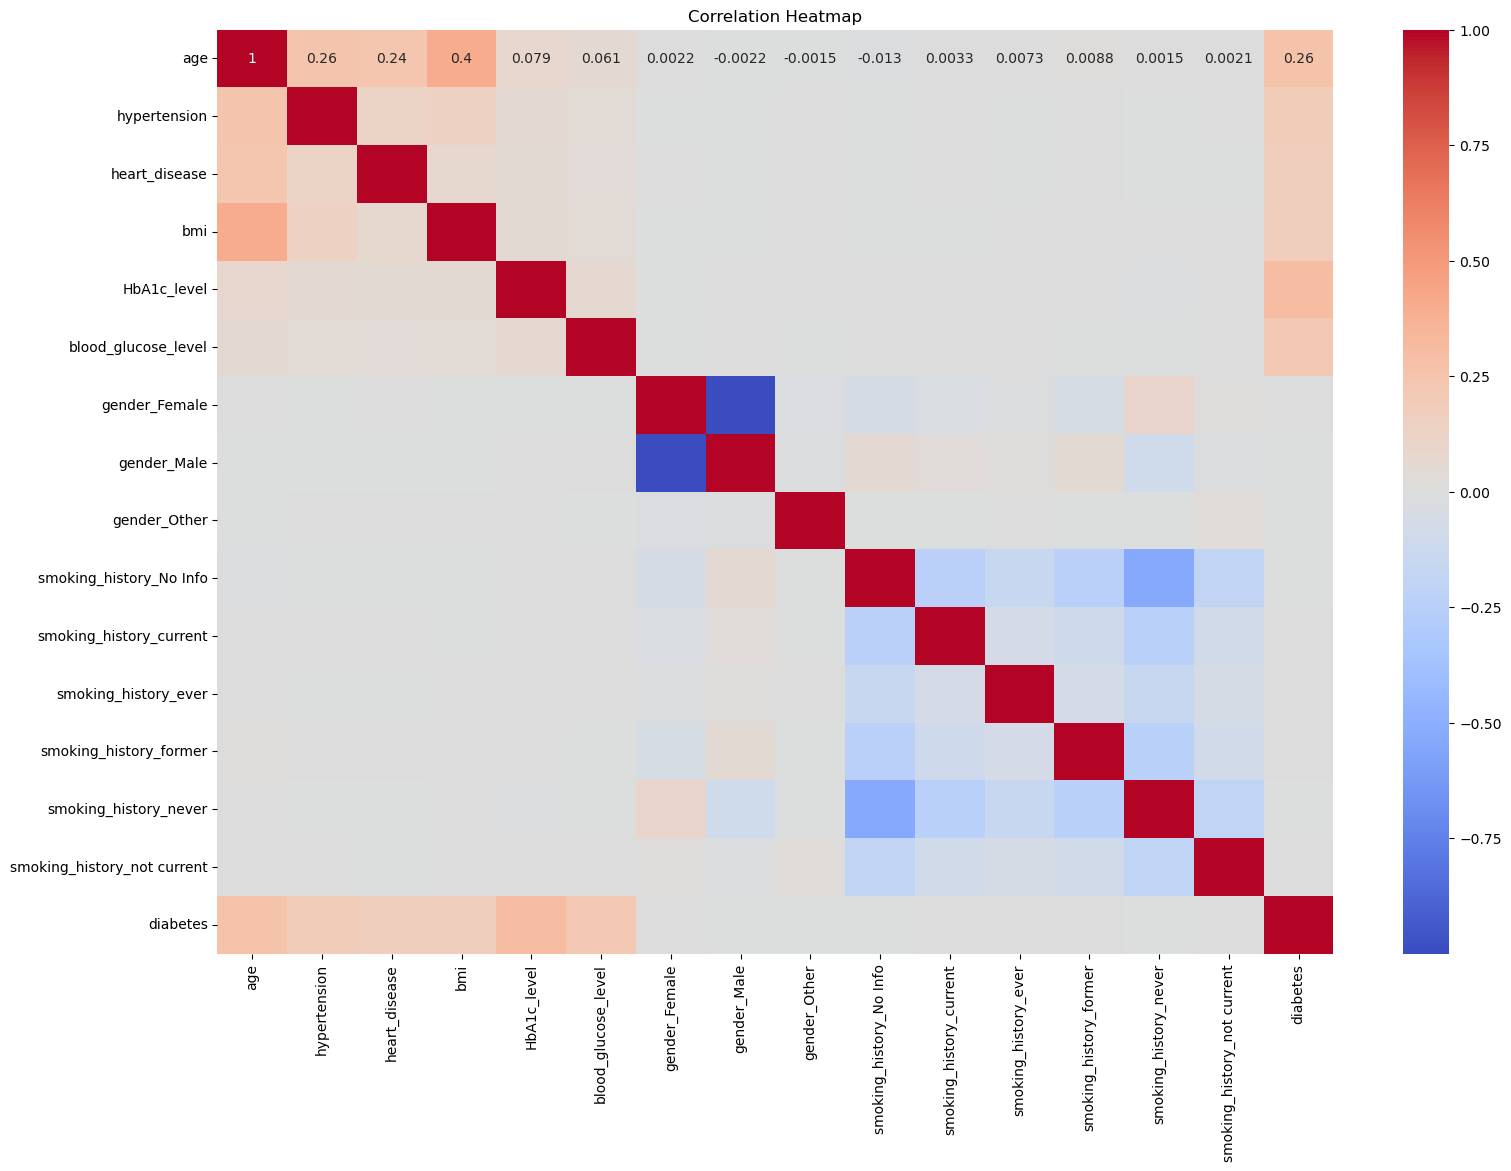

In [22]:
plt.figure(figsize=(18, 12))
correlation_matrix = df_reordered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:


X = df.iloc[:, :-1]  # 特征
y = df.iloc[:, -1]   # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 重新组合为完整的数据集
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# 保存分割后的数据集
train_data.to_csv("C:/Users/dell/Desktop/final_project/data/train_data.csv", index=False)
test_data.to_csv("C:/Users/dell/Desktop/final_project/data/test_data.csv", index=False)

print("save as train_dataset.csv and test_dataset.csv")

save as train_dataset.csv and test_dataset.csv
